In [47]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline

In [142]:
# # # Given
start_season_year = 1992
end_season_year = 2018
total_seasons = 26   # # (1992-2018)
total_teams = 20
column_headers = ['Teams', 'M', 'W', 'D', 'L', 'Goals', 'Diff', 'Pts']

In [3]:
data_dictionary = {}
for i in range(total_seasons):
    season_date = i + start_season_year
    data_dictionary[season_date] = pd.read_csv('../data/https___www.worldfootball.net_ ({0}).csv'.format(i), header=None, index_col=0)
    
    individual_dataframe = data_dictionary[season_date]
    
    # # Remove unknown columns
    del individual_dataframe[9]
    del individual_dataframe[10]
    
    # # Remove unknown index
    individual_dataframe.drop(individual_dataframe.index[:2], inplace=True)
    
    # # Good Columns Names
    individual_dataframe.columns = column_headers
    
    individual_dataframe = individual_dataframe.rename_axis(None, inplace=True)

In [109]:
data_dictionary[2005]

,Teams,M,W,D,L,Goals,Diff,Pts
1,Chelsea FC,38,29,4,5,72:22,50,91
2,Manchester United,38,25,8,5,72:34,38,83
3,Liverpool FC,38,25,7,6,57:25,32,82
4,Arsenal FC,38,20,7,11,68:31,37,67
5,Tottenham Hotspur,38,18,11,9,53:38,15,65
6,Blackburn Rovers,38,19,6,13,51:42,9,63
7,Newcastle United,38,17,7,14,47:42,5,58
8,Bolton Wanderers,38,15,11,12,49:41,8,56
9,West Ham United,38,16,7,15,52:55,-3,55
10,Wigan Athletic,38,15,6,17,45:52,-7,51


In [63]:
data_dictionary[2003].loc['1'][7]

'90'

### <center> Search for the most successful club in England <center/>

In [35]:
# # # Creating a Winner's dictionary with clubs and their respective title winning years
winners_dict = {}
winners_hist = {}
for i in range(total_seasons):
    season_date = i + start_season_year
    winner_club = data_dictionary[season_date].loc['1'][0]
    winners_dict[season_date] = winner_club
    
    # # For Winners Histogram
    if winner_club in winners_hist:
        winners_hist[winner_club] += 1
    else:
        winners_hist[winner_club] = 1

In [36]:
winners_hist

{'Manchester United': 13,
 'Blackburn Rovers': 1,
 'Arsenal FC': 3,
 'Chelsea FC': 5,
 'Manchester City': 3,
 'Leicester City': 1}

<BarContainer object of 6 artists>

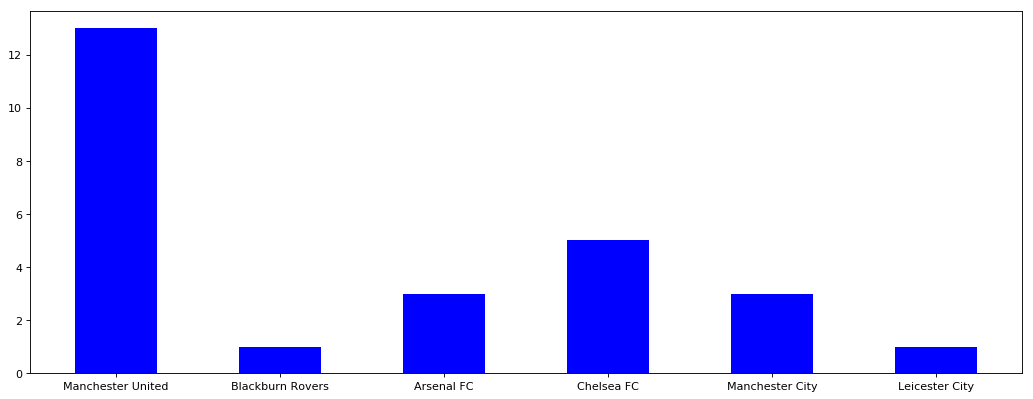

In [108]:
width = 0.5
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(winners_hist.keys(), winners_hist.values(), width, color='blue')

<center>This figure shows that the most successful club in the modern era of premier league is Manchester United</center>

### <center> Search for the most entertaining season</center>

##### <center>Entertaining cannot be defined easily. I'll try to calculate the entertaining season by the difference in points between the first place team and the last place team</center>

In [141]:
data_dictionary[2003].loc['1'][7]
a_sum = 0
b_sum = 0

    
b_sum = [i for i in data_dictionary[2003].loc[str(i+1)][7]]
print(b_sum)

1032
['3', '3']


In [172]:
# # Getting the difference in points season
difference_hist = {}
difference_points = []
# mean_points = []
for i in range(total_seasons):
    season_date = i + start_season_year
    
#     points = []
#     for j in range(total_teams):
#         points.append(int(data_dictionary[season_date].loc[str(j+1)][7]))
#     difference_hist[season_date]  = points
        
# print(difference_hist)
    
    
    
    
    winner_point = data_dictionary[season_date].loc['1'][7]
    loser_point = data_dictionary[season_date].loc['20'][7]
    total_points = 0
#     for j in range(total_teams):
#         total_points += int(data_dictionary[season_date].loc[str(j+1)][7])
#     mean_points.append(total_points / total_teams)
    difference_points.append(int(winner_point) - int(loser_point))
    # # difference_hist[season_date] = (winner_point, loser_point, differene_point)
    difference_hist[season_date] = (int(winner_point), int(loser_point))
print(difference_hist)
# print(mean_points)
print(difference_points)
print(np.argmax(np.array(difference_points)))
print(np.argmin(np.array(difference_points)))

{1992: (84, 49), 1993: (92, 42), 1994: (89, 43), 1995: (82, 29), 1996: (75, 34), 1997: (78, 33), 1998: (79, 30), 1999: (91, 24), 2000: (80, 26), 2001: (87, 28), 2002: (83, 19), 2003: (90, 33), 2004: (95, 32), 2005: (91, 15), 2006: (89, 28), 2007: (87, 11), 2008: (90, 32), 2009: (86, 19), 2010: (80, 33), 2011: (89, 25), 2012: (89, 25), 2013: (86, 30), 2014: (87, 30), 2015: (81, 17), 2016: (93, 24), 2017: (100, 31)}
[35, 50, 46, 53, 41, 45, 49, 67, 54, 59, 64, 57, 63, 76, 61, 76, 58, 67, 47, 64, 64, 56, 57, 64, 69, 69]
13
0


[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


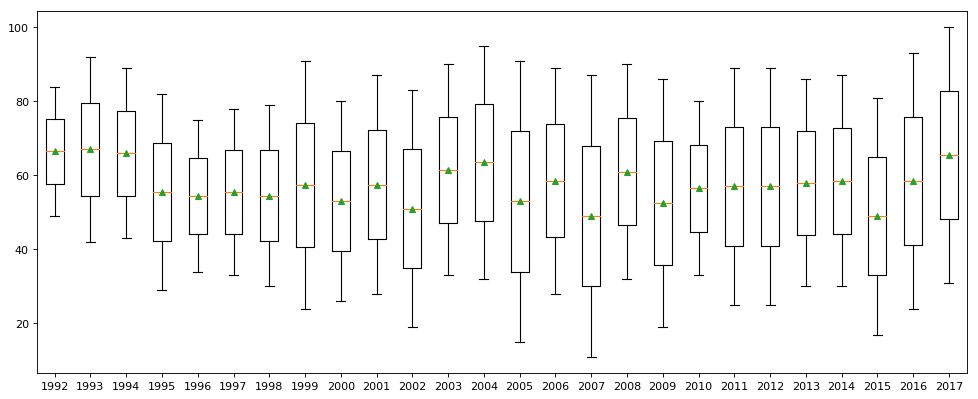

In [171]:
# plt.boxplot(data=difference_hist, x = difference_hist.values())
#plt.boxplot(x=[(1,2,3), (4,5,6)], data=[1,2])
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
x = list(difference_hist.values())
#means = [np.mean(tup) for tup in x]
# means=mean_points
data = list(difference_hist.keys())
print(data)
plt.boxplot(x=x, data=data, labels=data, showmeans=True)
plt.show()

<center>This figure shows the box plots of the points obtained in the premier league</center>

##### From this box plot we can find that
- 2007 has the least number of points obtained from a certain club
- 2017 has the highest number of points obtained from a certain club
- 1992 had the lowest difference between the highest point scoring club and lowest point scoring club
- 2005 has the largest difference between the highest point scoring club and lowest point scoring club